## 2-2. Hadamard test

As the simplest quantum algorithm, let's consider the following quantum circuit (Figure 1) called the Hadamard test. That is, the first bit is initialized to $|0\rangle$, the second and subsequent bits are initialized to state $|\psi\rangle$,and the Hadamard gate is first applied to the first bit. Then, the control unitary operator $\Lambda(U)$ (see below) is applied, Hadamard gate is again applied to the first bit, and finally the first bit is measured.

![figure 1](figs/2/Hadamard_test.png)

The control unitary operator $\Lambda(U)$ is a unitary operation that does nothing when the first qubit is $|0\rangle$, and apply $U$ when the first qubit is $|1\rangle$.


$$
\Lambda (U) = |0\rangle \langle 0| \otimes I + |1\rangle \langle 1|  \otimes U.
$$

In other words, depending on whether the first qubit is a $|0\rangle$ or a $|1\rangle$, a conditional branch is executed to "do nothing" or "let $U$ act". In a conventional computer, conditional branches cannot be executed simultaneously, but in a quantum computer, conditional branches can be executed **simultaneously and in parallel** by using superposition of states.

We will consider the operation of this Hadamard test. At first, for simplicity, we will consider the case where quantum state $|\psi \rangle$ is the eigenstates (eigenvectors) of the eigenvalue $e^{i \lambda}$ of the unitary operation (matrix) $U$ .

\begin{eqnarray}
U|\psi \rangle = e^{i \lambda} |\psi\rangle.
\end{eqnarray}

By letting the Hadamard operation $H$ act on the first qubit, we have

\begin{eqnarray}
\frac{1}{\sqrt{2}} (|0\rangle  + |1\rangle) \otimes |\psi  \rangle 
\end{eqnarray}

Then, by applying the control $U$ operation
**eigenvalue** **$e^{i\lambda}$** **is obtained as the relative phase of the first qubit** (this is called **phase kickback**):

\begin{eqnarray}
&&\frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi  \rangle  
+ |1\rangle \otimes U|\psi \rangle )
\\
&=&\frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi  \rangle  
+e^{i \lambda} |1\rangle \otimes |\psi \rangle )
\\
&=&
\frac{1}{\sqrt{2}} (|0\rangle   
+e^{i \lambda} |1\rangle )\otimes |\psi  \rangle.
\end{eqnarray}

Finally, by applying the Hadamard operation to the first qubit, the following state is obtained.

\begin{eqnarray}
\left(\frac{1+e^{i\lambda}}{2}|0\rangle  
+\frac{1-e^{i\lambda}}{2} |1\rangle \right)\otimes |\psi  \rangle 
\label{eq01}
\end{eqnarray}

The probability of getting the measurement result $m=0,1$ when measuring the first qubit is
<span style="color:red"> the square of the coefficients of $|0\rangle$ and $|1\rangle$. This can be expressed by using $m$ . (Substitute $m=0,1$ to make sure they match.)</span>


\begin{align}
p_{m}=\left|\frac{1+(-1)^m e^{i\lambda}}{2}\right|^2 
=\color{red}{\left|\frac{(1+(-1)^m \cos{\lambda})+i (-1)^m \sin{\lambda}}{2}\right|^2
=\frac{2+2 (-1)^m \cos \lambda}{4}}
=\frac{1+(-1)^m \cos \lambda}{2}
\end{align}

$|\psi \rangle$, $U$, and $\langle \psi |$ are
a column vector in $2^n$ dimensions, $2^n \times 2^n$ matrix, and
a row vector in $2^n$ dimensions.
If we compute this Hadamard test on a classical computer, exponentially large memory allocation and number of operations are required.
On the other hand, on a quantum computer $m$ is sampled under a probability distribution $p_m$.

If you want to estimate $\cos \lambda$ with a certain error $\epsilon$, then
we only need to sample about a polynomial number of times of the inverse of $\epsilon$.

If the same calculation is performed for general inputs, not necessarily eigenvectors, the pre-measurement state is

$$
 |0\rangle \frac{I+U}{2} |\psi \rangle  +  |1\rangle  \frac{I-U}{2} |\psi \rangle 
$$

When $p_0$, $p_1$ are the probability of measuring the first bit and obtaining 0 or 1,

\begin{align}
p_0 
&= \color{red}{\left|(|0\rangle \langle 0| \otimes I)(|0\rangle \frac{I+U}{2} |\psi \rangle + |1\rangle  \frac{I-U}{2}|\psi \rangle)\right|^2} \\
&= \color{red}{\left||0\rangle \frac{I+U}{2} |\psi \rangle \right|^2} \\
&= \color{red}{\left||0\rangle \right|^2 \left|\frac{I+U}{2} |\psi \rangle \right|^2} \\
&= \color{red}{\frac{\langle \psi | (I + U ^ \dagger) (I + U) | \psi \rangle }{4}} \\
&= \color{red}{\frac{\langle \psi | (I + U + U ^ \dagger + U ^ \dagger U) | \psi \rangle }{4}} \\
&= \color{red}{\frac{ \langle \psi | 2I | \psi \rangle + \langle \psi | U | \psi \rangle + \langle \psi | U ^ \dagger | \psi \rangle}{4}} \\
&= \color{red}{\frac{ 2 + \langle \psi | U | \psi \rangle + \overline{\langle \psi | U | \psi \rangle}}{4}} \\
&= \frac{1+ {\rm Re} \langle \psi | U | \psi \rangle }{2} \\
p_1 &= \frac{1- {\rm Re} \langle \psi | U | \psi \rangle }{2} \tag{1}
\end{align}

In other words, if you run the Hadamard test on a quantum computer, you can **estimate the value of unitary matrix** **$U$** **sandwiched between vector** **$| \psi \rangle$** by taking the sample average of the measurement results. If the same value were to be obtained with a classical computer, it would take exponential time because the dimension of the vector or matrix grows exponentially as the number of qubits $n$ grows.

After measuring the first qubit, the second qubit will be in the following state according to the measurement result $m = 0, 1$ (normalization factors are omitted)

$$
|\psi_0\rangle = \frac{I + U}{2}|\psi\rangle,
\quad
|\psi_1\rangle = \frac{I - U}{2}|\psi\rangle.
$$

Now consider the case where $U$ is a one-qubit unitary operation and its eigenvalues are $\pm 1$. Using the eigenvectors $|u_1\rangle$ and $|u_{-1}\rangle$ corresponding to the eigenvalue $\pm 1$, $|\psi\rangle$ can be written as follow. $|\psi\rangle = c_1|u_1\rangle + c_{-1}|u_{-1}\rangle$ . By substituting this to the state after measurement $|\psi_0\rangle$ and $|\psi_1\rangle$, 

\begin{align}
\color{red}{|\psi_0\rangle}
&= \color{red}{\frac{I + U}{2}|\psi\rangle} \\
&= \color{red}{\frac{I + U}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle)} \\
&= \color{red}{\frac{I}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle) + \frac{U}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle)} \\
&= \color{red}{\frac{1}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle) + \frac{1}{2}(c_1U|u_1\rangle + c_{-1}U|u_{-1}\rangle) }\\
&= \color{red}{\frac{1}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle) + \frac{1}{2}(c_1|u_1\rangle - c_{-1}|u_{-1}\rangle)} \\
&= \color{red}{c_1|u_1\rangle}\\
\end{align}

\begin{align}
\color{red}{|\psi_1\rangle }
&= \color{red}{\frac{I - U}{2}|\psi\rangle} \\
&= \color{red}{\frac{I - U}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle)} \\
&= \color{red}{\frac{I}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle) - \frac{U}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle)} \\
&= \color{red}{\frac{1}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle) - \frac{1}{2}(c_1U|u_1\rangle + c_{-1}U|u_{-1}\rangle)} \\
&= \color{red}{\frac{1}{2}(c_1|u_1\rangle + c_{-1}|u_{-1}\rangle) - \frac{1}{2}(c_1|u_1\rangle - c_{-1}|u_{-1}\rangle)} \\
&= \color{red}{c_{-1}|u_{-1}\rangle}\\
\end{align}

<span style="color:red">When we apply U to $|\psi_0\rangle$ and $|\psi_1\rangle$,</span>

\begin{align}
\color{red}{U|\psi_0\rangle }
&= \color{red}{U(c_1|u_1\rangle)}\\
&= \color{red}{c_1(U|u_1\rangle)}\\
&= \color{red}{c_1|u_1\rangle}\\
&= \color{red}{|\psi_0\rangle} \\
\end{align}

\begin{align}
\color{red}{U|\psi_1\rangle}
&= \color{red}{U(c_{-1}|u_{-1}\rangle)}\\
&= \color{red}{c_{-1}(U|u_{-1}\rangle)}\\
&= \color{red}{(-1)c_{-1}|u_{-1}\rangle}\\
&= \color{red}{-|\psi_1\rangle} \\
\end{align}


it turns out that they are the eigenstates corresponding to the eigenvalue $\pm 1$, respectively. Even when the eigenvalue is not $\pm 1$, the state converges to the eigenstate of $U$ when the output of the Hadamard test is repeated as input (those interested are encouraged to try the following example).

### Implementation in SymPy
As a concrete example, let us consider the case $U=H$ (Hadamard gate). Assume that the auxiliary qubit is $|0\rangle$ and the input of the Hadamard test $|\psi\rangle$ is also $|0\rangle$.

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # to show vectors and matrices nicely
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [13]:
# Run only on Google Colaboratory
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax && window.google && window.google.colab) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [14]:
state = Qubit('00')

The matrix representation of control H operation is displayed with `CGateS()`.

In [15]:
ctrlH = CGateS(1,H(0))
represent(ctrlH,nqubits=2)

⎡1  0  0    0  ⎤
⎢              ⎥
⎢0  1  0    0  ⎥
⎢              ⎥
⎢      √2   1  ⎥
⎢0  0  ──   ── ⎥
⎢      2    √2 ⎥
⎢              ⎥
⎢      1   -√2 ⎥
⎢0  0  ──  ────⎥
⎣      √2   2  ⎦

Before the measurement, the state is

In [16]:
H(1)*ctrlH*H(1)*state

Calculations with SymPy gives us

In [17]:
qapply(H(1)*ctrlH*H(1)*state)

Using SymPy's `measure_partial` function introduced in Chapter 1, post-measurement state and probability of getting 0 from measurement of the first qubit is

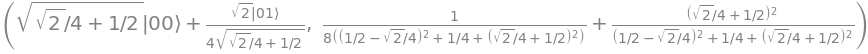

In [18]:
from sympy.physics.quantum.qubit import measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot
measured_state_and_probability_zero = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[0]
simplify(measured_state_and_probability_zero)

Because $\langle 0 | H | 0\rangle = 1/\sqrt{2}$ , we see that the measurement probability is consistent with equation (1).   
Also, when we let $H$ act on the second qubit, we see that the state after the measurement is an eigenvector of $H$ (note that the SymPy index correspond so that the first qubit from the left is 1 and the second one is 0.)

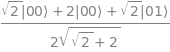

In [9]:
measured_state_zero = measured_state_and_probability_zero[0]
simplify(qapply(H(0)*measured_state_zero))

Similarly, if you get a measurement result of 1 from the first qubit, we can confirm that the post measurement state is an eigenstate with eigenvalue -1. Please check this.

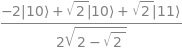

In [10]:
measured_state_one = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[1][0]
simplify(qapply(H(0)*measured_state_one))